# Hands-on tutorial on Convnets with Keras
Adapted from assignments 2 and 3 of CS231N: 

http://cs231n.github.io/assignment2/

http://cs231n.github.io/assignment3/

Pre-requisites:

CS231N:
http://cs231n.github.io/neural-networks-3

http://cs231n.github.io/convolutional-networks/




Python 2.7: https://www.codecademy.com/tracks/python

Numpy: https://www.reddit.com/r/Python/comments/1wwwss/100_numpy_exercises/

Keras: http://keras.io/
 

Install Keras and dependencies, and download assigment 2: http://vision.stanford.edu/teaching/cs231n/assignment2.zip


In [74]:


%matplotlib inline

import numpy as np
from sklearn.preprocessing import StandardScaler  

from matplotlib import pyplot as plt

from cs231n.data_utils import load_CIFAR_batch

from keras.utils import np_utils

from __future__ import absolute_import
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adadelta, Adagrad
from keras.utils import np_utils, generic_utils


from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

from keras.regularizers import l2, activity_l2



import theano.tensor.signal.conv 
from theano.tensor.signal import downsample

# Load the data
Load up part of CIFAR-10 data, so we can use it to train a classifier.

In [75]:

cifar10_batch_1 = 'cs231n/datasets/cifar-10-batches-py/data_batch_1'
X_train, y_train = load_CIFAR_batch(cifar10_batch_1)
    
    

# Visualize some images


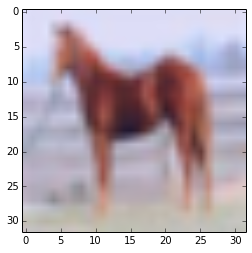

In [203]:
img = 255- X_train[np.random.randint(3000)] 

plt.imshow(img)

# Pre-process data


In [3]:
X_train, y_train = X_train[:3000], y_train[:3000] #smaller dataset to speed-up experimentation

In [5]:
def preprocess_data(X, scaler=None):
    if not scaler:
        scaler = StandardScaler()
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler

In [6]:
X_train, scaler = preprocess_data(X_train)
Y_train = np_utils.to_categorical(y_train)


In [7]:
X_train.shape #check the input shape

(3000, 3, 32, 32)

# Train a ConvNet!

The architecture is conv-relu-pool-Dense-softmax, where the conv layer uses stride-1 "same" convolutions to preserve the input size; the pool layer uses non-overlapping
  2x2 pooling regions.

In [8]:
# number of convolutional filters to use at each layer
nb_filters = 32
# level of pooling to perform at each layer (POOL x POOL)
nb_pool = 2
# level of convolution to perform at each layer (CONV x CONV)
nb_conv =  3
# the CIFAR10 images are RGB
image_dimensions = 3

#suggested parameters:
# nb_epoch=30, batch_size=10, validation_split=0.33333
# lr=0.0001, decay=1e-6, momentum=0.9


In [9]:
#Indication: https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py

#To keep track of training, use callbacks: see https://groups.google.com/forum/#!topic/keras-users/XK_a5r1vhZQ 

##Your code here##


Plot the loss training/validation curves, and the accuracy  training/validation curves, using the history.history dictionary. It should show clear overfitting:

In [11]:
#Suggestion: plot with pandas and ggplot http://ggplot.yhathq.com/

##Your code here ##



# Dropout
To reduce overfitting, we can use dropout. Add dropout to your model, and see what happens! 

In [15]:
## Your code here ##


Plot the loss training/validation curves, and the accuracy  training/validation curves.

In [34]:
## Your code here ##


Are you satisfied by the improvement? Comment your result:

 (your comment here)



#Data Augmentation


Another way to reduce overfitting is to implement data augmentation. Since we have very little training data, we will use what little training data we have to generate artificial data, and use this artificial data to train our network.


In [54]:
## Re-initialize your model (by re-running the cell in which it is defined)


This time, we need to do the train/validation data split manually 

In [55]:
def split_data(X_train,y_train, num_training=2000):
    num_validation= len(X_train)- num_training
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    return X_train, y_train, X_val, y_val

In [56]:

X_train, Y_train, X_val, Y_val= split_data(X_train,Y_train)


In [57]:
#See http://keras.io/preprocessing/image/

import keras

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

In [3]:
#Indication: https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py
# You will need to modify this code in order to plot loss and accuracy curves.

## Your code here ##


Are you satisfied by the improvement? Comment your result:

 (your comment here)



#Hyper-parameter optimization with Hyperopt


Intro: http://blog.dato.com/how-to-evaluate-machine-learning-models-part-4-hyperparameter-tuning

We try hyperopt: http://hyperopt.github.io/hyperopt/

http://fastml.com/optimizing-hyperparams-with-hyperopt/





Here, we optimize the learning rate, dropout, decay rate, batch size.

In [31]:
#Installation in Linux

#sudo pip install pymongo
#sudo pip install hyperopt

In [55]:
import hyperopt
from hyperopt import hp
from hyperopt import fmin, tpe, hp, rand

Random search

In [2]:
## Your code here ##

    

"Smart" search (TPE)

In [1]:
## Your code here ##



### Other things you can try:
- Filter size: smaller filters may be more efficient
- Number of filters: Above we used 32 filters. Do more or fewer do better?
- Network depth: The network above has two layers of trainable parameters. Can you do better with a deeper network? You can implement alternative architectures. Some good architectures to try include:
    - [conv-relu-pool]xN - conv - relu - [affine]xM - [softmax or SVM]
    - [conv-relu-pool]XN - [affine]XM - [softmax or SVM]
    - [conv-relu-conv-relu-pool]xN - [affine]xM - [softmax or SVM]


You should tune the learning rate and regularization strength. When doing this there are a couple important things to keep in mind:

- If the parameters are working well, you should see improvement within a few hundred iterations
- Remember the coarse-to-fine approach for hyperparameter tuning: start by testing a large range of hyperparameters for just a few training iterations to find the combinations of parameters that are working at all.
- Once you have found some sets of parameters that seem to work, search more finely around these parameters. You may need to train for more epochs.

### Going above and beyond
If you are feeling adventurous there are many other features you can implement to try and improve your performance.

- Alternative update steps: For the assignment we implemented SGD+momentum and RMSprop; you could try alternatives like AdaGrad or AdaDelta.
- Other forms of regularization such as L1 or L2
- Alternative activation functions such as leaky ReLU or maxout
- Model ensembles



Have fun and happy training!

# transfer learning